# ENSEMBLE LEARNING

Ensemble learning adalah teknik yang digunakan dalam machine learning di mana beberapa model atau "pembelajaran" digabungkan untuk meningkatkan kinerja prediksi secara keseluruhan. Konsep dasar di balik ensemble learning adalah bahwa dengan menggabungkan prediksi dari beberapa model yang berbeda, kita dapat menghasilkan prediksi yang lebih akurat daripada yang dapat dicapai oleh setiap model individu. Ensemble learning dapat diterapkan baik untuk masalah klasifikasi maupun regresi. Komponen-komponen utama dalam Ensemble Learning:

1. Base Learners

       Base learners adalah model individu atau algoritma pembelajaran yang digunakan dalam ensemble. Base learners biasanya dipilih dari berbagai jenis model untuk memperoleh keberagaman yang cukup dalam prediksi. Contoh base learners termasuk Decision Trees, Random Forests, Support Vector Machines (SVM), Neural Networks, dll.
    
2. Ensemble Methods

       Ensemble methods adalah pendekatan yang digunakan untuk menggabungkan prediksi dari base learners. Terdapat beberapa metode ensemble yang umum, termasuk Bagging, Boosting, dan Stacking.
3. Agregation Strategy

       Aggregation strategy atau metode agregasi adalah cara untuk menggabungkan prediksi dari base learners menjadi satu prediksi ensemble. Beberapa strategi agregasi yang umum termasuk:

        - Voting: Menggunakan mayoritas suara dari base learners untuk membuat prediksi.
        - Averaging: Mengambil rata-rata dari prediksi base learners untuk membuat prediksi akhir.
        - Weighted Averaging: Mengambil rata-rata terbobot dari prediksi base learners, di mana bobot diberikan berdasarkan kinerja atau kepercayaan terhadap setiap model.

In [1]:
# Impor library yang diperlukan
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Inisialisasi base models
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier()
nn_model = MLPClassifier()

In [5]:
# Ensemble dengan metode Voting Classifier
ensemble_model = VotingClassifier(estimators=[('nb', nb_model), ('dt', dt_model), ('nn', nn_model)], voting='hard')

In [6]:
# Latih model ensemble pada data latih
ensemble_model.fit(X_train, y_train)

/Users/ariful/Library/CloudStorage/GoogleDrive-ariful.furqon@unej.ac.id/My Drive/Universitas Jember/Pendidikan/23242/Kecerdasan Buatan/Kecerdasan-Buatan-KTU1047/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingClassifier(estimators=[('nb', GaussianNB()),
                             ('dt', DecisionTreeClassifier()),
                             ('nn', MLPClassifier())])

In [7]:
# Lakukan prediksi pada data uji
y_pred = ensemble_model.predict(X_test)

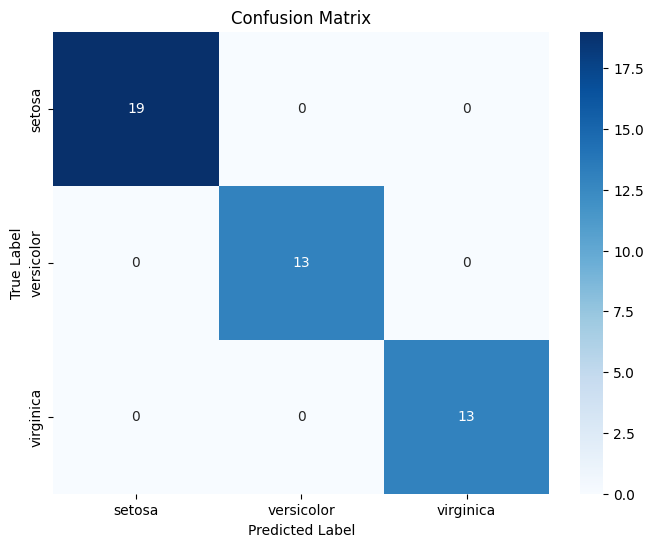

In [8]:
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasikan confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [9]:
# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [10]:
# Tampilkan Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

